In [38]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp, copy

In [39]:
#listing the constants and parameters
M = 9.109e-31         #mass of electron, kg
L = 1.e-8             #length of the box, m
x0 = L/2              #initial x at t=0
sigma = 1.e-10        #width of the wave packet
kappa = 5.e10         #wave number
x_1 = 0               #boundary condition
x_2 = L               #boundary condition
h = 1.e-18            # size of the time step
hbar = 1.05457182e-34 #planck's constant
N = 1000              #spatial slices
a = L/N               #spacing of spatial grids

In [40]:
def banded(Aa,va,up,down): #3 by n matrix, b_solving, 1, 1

    # Copy the inputs and determine the size of the system
    A = copy(Aa)
    v = copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):

        # Normalization factor
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v

In [41]:
def psi(x):
  '''defining the initial wave function'''
  return np.exp(-((x-x0) ** 2)/(2 * sigma**2)) *  np.exp(1j*kappa*x)

In [42]:
X = np.linspace(0, L, N+1) #value for x
psi0 = np.zeros((N+1), complex) #array for storing values of psi
for i, j in enumerate(X):
  psi0[i] = psi(j)

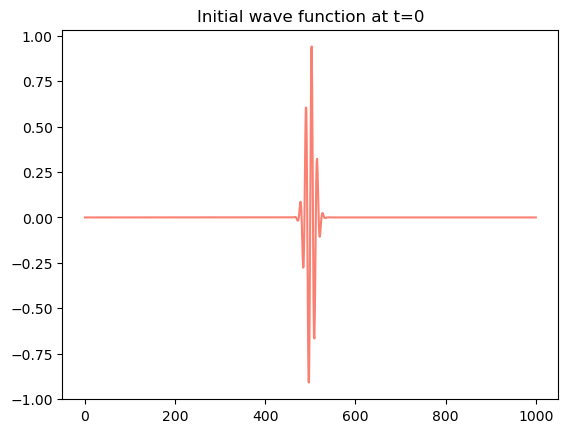

In [43]:
plt.plot(psi0, color = 'salmon')
plt.title("Initial wave function at t=0")
plt.show()

In [44]:
# defining matrix entries for A and B
a_1 = 1+ (h*1j*hbar)/(2*M*a**2)
a_2 = - h*1j*hbar/(4*M*a**2)
b_1 = 1 - (h * ((1j * hbar) / (2*M*(a**2))))
b_2 = h * ((1j * hbar) / (4*M*(a**2)))

A = np.zeros([3,N+1], complex)  # 3 rows, 1001 columns
A[0,:] = a_2 #all the elements of the first zero array is equal to a_2
A[1,:] = a_1 #all the elements of the second zero array is equal to a_1
A[2,:] = a_2 #all the elements of the third zero array is equal to a_2

In [46]:
#defining vector v
v_grid = np.zeros(N+1, complex)
v_grid[1:N] = b_1 * psi0[1:N] + b_2 * (psi0[2:N+1] + psi0[0:N-1])

#solving for the linear system using banded.py
psi = banded(A, v_grid, 1,1)

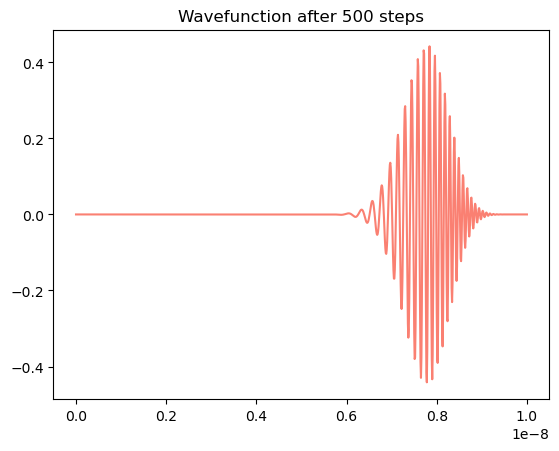

In [47]:
for i in range(500):
  v_grid[1:N] = b_1 * psi[1:N] + b_2 * (psi[2:N+1] + psi[0:N-1])
  psi = banded(A, v_grid, 1, 1)

#plotting 
plt.plot(X, np.real(psi), color = 'salmon')
plt.title("Wavefunction after 500 steps")
plt.show()